In [256]:
!pip install pandas_datareader
import pandas as pd
import numpy as np
!pip install arch
from arch import arch_model
import statsmodels.api as sm
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import pandas_datareader.data as web
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [331]:
df2 = pd.read_excel(r'C:\Users\BRIDGET\Documents\My Spring 2024\My Spring Folder 2024\Econometrics 710\Python codes and Data\RAAdata.xlsx')
df= df2.dropna()
df.head(5)

,observation_date,RAAA,RAAA(t-1),R3,R3(t-1),R3(t-2),IP,IP(t-1),PW,PW(t-1),GPW
2,1960-03-01,4.49,4.56,3.31,3.96,4.35,24.5611,24.7836,31.8,31.6,0.006329
3,1960-04-01,4.45,4.49,3.23,3.31,3.96,24.3664,24.5611,31.8,31.8,0.000000
4,1960-05-01,4.46,4.45,3.29,3.23,3.31,24.3386,24.3664,31.7,31.8,-0.003145
5,1960-06-01,4.45,4.46,2.46,3.29,3.23,24.0326,24.3386,31.7,31.7,0.000000
6,1960-07-01,4.41,4.45,2.30,2.46,3.29,23.9492,24.0326,31.7,31.7,0.000000


In [258]:
print(df.columns)

Index(['observation_date', 'RAAA', 'RAAA(t-1)', 'R3', 'R3(t-1)', 'R3(t-2)',
       'IP', 'IP(t-1)', 'PW', 'PW(t-1)', 'GPW'],
      dtype='object')


In [389]:
#Garch(1,1)
returns = Y.pct_change().dropna()
am = arch_model(returns, vol='GARCH', p=1, q=1)
garch_model = arch_model(residuals, mean='Constant', vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(disp='off')
res = am.fit()
print(res)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 598460836.4317628
Iteration:      2,   Func. Count:     17,   Neg. LLF: 341771479.05048245
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22363.124385443123
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2416647.98992588
Iteration:      5,   Func. Count:     50,   Neg. LLF: 1459991.4042517906
Iteration:      6,   Func. Count:     60,   Neg. LLF: -1104.9351403419246
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1104.9351389196077
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   RAAA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1104.94
Distribution:                  Normal 

C:\Users\BRIDGET\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000563. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [390]:
#OLS Result
import statsmodels.api as sm
X = df[['RAAA(t-1)', 'R3', 'R3(t-1)', 'R3(t-2)', 'IP', 'IP(t-1)', 'GPW']]
Y = df['RAAA']
x = sm.add_constant(X)
ols_model = sm.OLS(Y, X).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   RAAA   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.377e+05
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:25:12   Log-Likelihood:                          124.30
No. Observations:                 442   AIC:                                     -234.6
Df Residuals:                     435   BIC:                                     -206.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'AAA Returns')

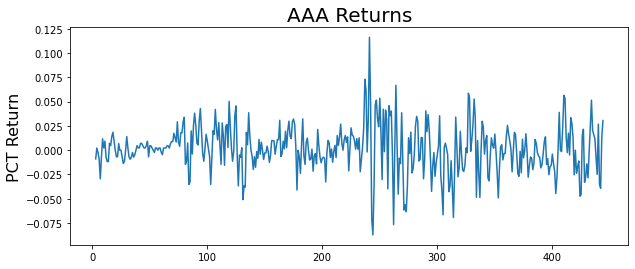

In [352]:
#The RAAA regression residual 
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('PCT Return', fontsize=16)
plt.title('AAA Returns', fontsize=20)

In [353]:
df.loc[:, 'R3(t-1)_changes'] = df['R3(t-1)'].diff()
R31C = df['R3(t-1)_changes']
print(df.columns)

Index(['observation_date', 'RAAA', 'RAAA(t-1)', 'R3', 'R3(t-1)', 'R3(t-2)',
       'IP', 'IP(t-1)', 'PW', 'PW(t-1)', 'GPW', 'conditional_volatility**2',
       'conditional_volatility', 'R3(t-1)_changes'],
      dtype='object')


C:\Users\BRIDGET\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\BRIDGET\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [364]:
#introducing R3(t-1)_changes to (GARCH 1,1) model

df = df.replace([np.inf, -np.inf], np.nan) 
df = df.dropna(subset=['R3(t-1)_changes', 'RAAA']) 
X = sm.add_constant(df['R3(t-1)_changes'])
model = sm.OLS(df['RAAA'], X).fit()
residuals = model.resid
am = arch_model(residuals, mean='Constant', vol='GARCH', p=1, q=1, rescale=False)
res = am.fit(disp='off')
print(model.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   RAAA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05038
Date:                Sat, 24 Feb 2024   Prob (F-statistic):              0.823
Time:                        15:54:23   Log-Likelihood:                -1053.6
No. Observations:                 442   AIC:                             2111.
Df Residuals:                     440   BIC:                             2119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.1885      0.125     

In [298]:
#GARRCH (2,2)
X = sm.add_constant(df['R3(t-1)_changes'])
model = sm.OLS(df['returns'], X).fit()
residuals = model.resid
am = arch_model(residuals, mean='Constant', vol='GARCH', p=2, q=2, rescale=False)
res = am.fit(disp='off')
print(model.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     21.80
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           4.03e-06
Time:                        12:03:26   Log-Likelihood:                 1040.0
No. Observations:                 443   AIC:                            -2076.
Df Residuals:                     441   BIC:                            -2068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0011      0.001     

In [302]:
X = sm.add_constant(df[['R3(t-1)_changes', 'R3(t-1)', 'R3(t-2)']])
model = sm.OLS(df['returns'], X).fit()
residuals = model.resid
am = arch_model(residuals, mean='Constant', vol='GARCH', p=2, q=2, rescale=False)
res = am.fit(disp='off')
print(model.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     7.252
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           9.30e-05
Time:                        12:11:36   Log-Likelihood:                 1040.0
No. Observations:                 443   AIC:                            -2072.
Df Residuals:                     439   BIC:                            -2056.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.003     

In [381]:
##Introducing conditional Volatility (Standard deviation) into the Garch model
garch_model = arch_model(residuals, mean='Constant', vol='GARCH', p=1, q=1, rescale=False)
garch_result = garch_model.fit(disp='off')
conditional_volatility = garch_result.conditional_volatility
df['conditional_volatility'] = conditional_volatility
df_clean = df.dropna()
X = sm.add_constant(df_clean[['conditional_volatility']])
y = df_clean['RAAA']
ols_model = sm.OLS(returns, X).fit()
print(ols_model.summary())
print(garch_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RAAA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5045
Date:                Sat, 24 Feb 2024   Prob (F-statistic):              0.478
Time:                        17:30:23   Log-Likelihood:                 1026.7
No. Observations:                 442   AIC:                            -2049.
Df Residuals:                     440   BIC:                            -2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [310]:
#GARCH in Mean specification model.
returns = df['returns']
garch_m_model = arch_model(returns, mean='Constant', vol='GARCH', p=1, q=1, dist='normal', rescale=False)
garch_m_result = garch_m_model.fit(update_freq=5)
print(garch_m_result.summary())

Iteration:      5,   Func. Count:     48,   Neg. LLF: 74086.03951722595
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1108.6834886985837
            Iterations: 9
            Function evaluations: 78
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1108.68
Distribution:                  Normal   AIC:                          -2209.37
Method:            Maximum Likelihood   BIC:                          -2192.99
                                        No. Observations:                  443
Date:                Sat, Feb 24 2024   Df Residuals:                      442
Time:                        13:52:47   Df Model:                            1
        

In [391]:
##Introducing lagged-1 Variance into the Garch model 

garch_model = arch_model(returns, mean='Constant', vol='GARCH', p=1, q=1, dist='normal', rescale=False)
garch_result = garch_model.fit(disp='off')
conditional_variances = garch_result.conditional_volatility**2
conditional_variances.index = returns.index
lagged_variance = conditional_variances.shift(1)
df_for_regression = pd.DataFrame({
    'returns': returns,
    'lagged_variance': lagged_variance
}).dropna()
X = sm.add_constant(df_for_regression[['lagged_variance']])
model = sm.OLS(df_for_regression['returns'], X).fit()
print(model.summary())
print(garch_result.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.002777
Date:                Sat, 24 Feb 2024   Prob (F-statistic):              0.958
Time:                        19:44:19   Log-Likelihood:                 1023.7
No. Observations:                 441   AIC:                            -2043.
Df Residuals:                     439   BIC:                            -2035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0014      0.002     

In [371]:
df.head()

,observation_date,RAAA,RAAA(t-1),R3,R3(t-1),R3(t-2),IP,IP(t-1),PW,PW(t-1),GPW,conditional_volatility**2,conditional_volatility,R3(t-1)_changes
3,1960-04-01,4.45,4.49,3.23,3.31,3.96,24.3664,24.5611,31.8,31.8,0.000000,0.000121,0.009305,-0.65
4,1960-05-01,4.46,4.45,3.29,3.23,3.31,24.3386,24.3664,31.7,31.8,-0.003145,0.000125,0.008935,-0.08
5,1960-06-01,4.45,4.46,2.46,3.29,3.23,24.0326,24.3386,31.7,31.7,0.000000,0.000109,0.008632,0.06
6,1960-07-01,4.41,4.45,2.30,2.46,3.29,23.9492,24.0326,31.7,31.7,0.000000,0.000098,0.008411,-0.83
7,1960-08-01,4.28,4.41,2.30,2.30,2.46,23.9213,23.9492,31.6,31.7,-0.003155,0.000108,0.008130,-0.16


In [388]:
#Introducing Variance into the Garch model 
garch_model = arch_model(returns, mean='Constant', vol='GARCH', p=1, q=1, dist='normal', rescale=False)
garch_result = garch_model.fit(disp='off')
conditional_variances = garch_result.conditional_volatility**2
conditional_variances.index = returns.index
df_for_regression = pd.DataFrame({
    'returns': returns,
    'variance': conditional_variances 
}).dropna() 

X = sm.add_constant(df_for_regression[['variance']])
model = sm.OLS(df_for_regression['returns'], X).fit()
print(model.summary())
print(garch_result.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 0.0005036
Date:                Sat, 24 Feb 2024   Prob (F-statistic):              0.982
Time:                        17:59:39   Log-Likelihood:                 1026.4
No. Observations:                 442   AIC:                            -2049.
Df Residuals:                     440   BIC:                            -2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.002      0.896      0.3